<a href="https://colab.research.google.com/github/AlexandraLakka/Ptixiaki/blob/master/CPU_Memory_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import gc
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std
from numpy import arange
from numpy import absolute

from random import randint
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/thesis/Dataset-VM1.xlsx")
df = df.drop(df.columns[[-1]], axis=1)
df

,VM_CPU(cores),VM_RAM (bytes),Input_function,Num_of_Input,Type_of_Input,Input 1,Input 2,Size of input (bytes),Type_of_Output,Number_of_files,Max_Virtual_Memory (MB),Min_Virtual_Memory (MB),Avg_Virtual_Memory (MB),Max_Resident_Memory (MB),Min_Resident_Memory (MB),Avg_Resident_Memory (MB),Max_CPU_time (sec),Min_CPU_time (sec),Avg_CPU_time (sec),Total_Exec_Time (sec)
0,1,2048,merge_sort,1,list of integers,20000,None,178016,list of integers,1,176.09,176.09,176.09,19.32,19.32,19.32,0.13,0.13,0.13,0.22
1,1,2048,merge_sort,1,list of integers,50000,None,415468,list of integers,1,169.23,169.23,169.23,20.58,20.58,20.58,0.16,0.16,0.16,0.62
2,1,2048,merge_sort,1,list of integers,80000,None,651344,list of integers,1,176.96,176.96,176.96,20.50,20.50,20.50,0.14,0.14,0.14,1.23
3,1,2048,merge_sort,1,list of integers,100000,None,812456,list of integers,1,170.80,170.80,170.80,21.95,21.95,21.95,0.20,0.20,0.20,1.40
4,1,2048,merge_sort,1,list of integers,120000,None,1043552,list of integers,1,177.51,177.51,177.51,20.49,20.49,20.49,0.13,0.13,0.13,1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,2048,factorial,2,integer,389254,None,28,float,66,180.52,175.09,176.35,23.53,18.26,19.42,134.94,0.13,37.35,203.02
146,1,2048,factorial,2,integer,445431,None,28,float,88,245.39,167.08,203.15,24.43,18.21,19.66,187.95,0.15,51.46,276.78
147,1,2048,factorial,2,integer,496401,None,28,float,114,182.18,175.09,176.83,25.32,18.24,19.88,238.09,0.14,65.80,353.97
148,1,2048,factorial,2,integer,510200,None,28,float,115,182.39,175.09,176.84,25.43,18.35,20.00,249.30,0.14,67.02,362.51


In [ ]:
max_mem = df.iloc[:, 13]
min_mem = df.iloc[:, 14]
avg_mem = df.iloc[:, 15]

max_mem_bytes = []
min_mem_bytes = []
avg_mem_bytes = []

for i in max_mem:
  max_mem_bytes.append(i * 1048576)

for i in min_mem:
  min_mem_bytes.append(i * 1048576)

for i in avg_mem:
  avg_mem_bytes.append(i * 1048576)

In [ ]:
df.insert(20, 'Max Resident Memory (Bytes)', max_mem_bytes)
df.insert(21, 'Min Resident Memory (Bytes)', min_mem_bytes)
df.insert(22, 'Avg Resident Memory (Bytes)', avg_mem_bytes)

In [ ]:
df

,VM_CPU(cores),VM_RAM (bytes),Input_function,Num_of_Input,Type_of_Input,Input 1,Input 2,Size of input (bytes),Type_of_Output,Number_of_files,Max_Virtual_Memory (MB),Min_Virtual_Memory (MB),Avg_Virtual_Memory (MB),Max_Resident_Memory (MB),Min_Resident_Memory (MB),Avg_Resident_Memory (MB),Max_CPU_time (sec),Min_CPU_time (sec),Avg_CPU_time (sec),Total_Exec_Time (sec),Max Resident Memory (Bytes),Min Resident Memory (Bytes),Avg Resident Memory (Bytes)
0,1,2048,merge_sort,1,list of integers,20000,None,178016,list of integers,1,176.09,176.09,176.09,19.32,19.32,19.32,0.13,0.13,0.13,0.22,20258488.32,20258488.32,20258488.32
1,1,2048,merge_sort,1,list of integers,50000,None,415468,list of integers,1,169.23,169.23,169.23,20.58,20.58,20.58,0.16,0.16,0.16,0.62,21579694.08,21579694.08,21579694.08
2,1,2048,merge_sort,1,list of integers,80000,None,651344,list of integers,1,176.96,176.96,176.96,20.50,20.50,20.50,0.14,0.14,0.14,1.23,21495808.00,21495808.00,21495808.00
3,1,2048,merge_sort,1,list of integers,100000,None,812456,list of integers,1,170.80,170.80,170.80,21.95,21.95,21.95,0.20,0.20,0.20,1.40,23016243.20,23016243.20,23016243.20
4,1,2048,merge_sort,1,list of integers,120000,None,1043552,list of integers,1,177.51,177.51,177.51,20.49,20.49,20.49,0.13,0.13,0.13,1.64,21485322.24,21485322.24,21485322.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,2048,factorial,2,integer,389254,None,28,float,66,180.52,175.09,176.35,23.53,18.26,19.42,134.94,0.13,37.35,203.02,24672993.28,19146997.76,20363345.92
146,1,2048,factorial,2,integer,445431,None,28,float,88,245.39,167.08,203.15,24.43,18.21,19.66,187.95,0.15,51.46,276.78,25616711.68,19094568.96,20615004.16
147,1,2048,factorial,2,integer,496401,None,28,float,114,182.18,175.09,176.83,25.32,18.24,19.88,238.09,0.14,65.80,353.97,26549944.32,19126026.24,20845690.88
148,1,2048,factorial,2,integer,510200,None,28,float,115,182.39,175.09,176.84,25.43,18.35,20.00,249.30,0.14,67.02,362.51,26665287.68,19241369.60,20971520.00


In [ ]:
#x = df.iloc[:, [0, 1, 2, 3, 4, 7, 18, 19, 22]]
x = df.iloc[:, [0, 1, 2, 3, 4, 7, 19]]
encode = x.values.tolist()
array = np.array(encode)
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(array[:, 2])
array[:, 2] = label_encoder.transform(array[:, 2])

label_encoder = label_encoder.fit(array[:, 4])
array[:, 4] = label_encoder.transform(array[:, 4])

print(array)

[['1' '2048' '2' ... '1' '178016' '0.22']
 ['1' '2048' '2' ... '1' '415468' '0.62']
 ['1' '2048' '2' ... '1' '651344' '1.23']
 ...
 ['1' '2048' '1' ... '0' '28' '353.97']
 ['1' '2048' '1' ... '0' '28' '362.51']
 ['1' '2048' '1' ... '0' '28' '382.09']]


In [ ]:
onehot_encoder = OneHotEncoder().fit_transform(array).toarray()

In [ ]:
X = onehot_encoder
#X = array
y = df.iloc[:, [16, 20]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
model = Ridge()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train, y_train)

Mean MAE: 0.313 (0.139)


Ridge()

In [ ]:
prediction = model.predict(X_test)
prediction

array([[8.41000000e+00, 8.20982579e+07],
       [3.67900000e+01, 2.18103808e+07],
       [9.29500000e+00, 8.57525453e+07],
       [3.67900000e+01, 2.18103808e+07],
       [2.88300000e+01, 3.99402598e+07],
       [9.29500000e+00, 8.57525453e+07],
       [1.70700000e+01, 7.68344064e+07],
       [1.58850000e+01, 6.64692326e+07],
       [1.58850000e+01, 6.64692326e+07],
       [9.29500000e+00, 8.57525453e+07],
       [7.23100000e+01, 5.76349798e+07],
       [3.67900000e+01, 2.18103808e+07],
       [1.58850000e+01, 6.64692326e+07],
       [9.29500000e+00, 8.57525453e+07],
       [1.58850000e+01, 6.64692326e+07]])

In [ ]:
r2 = r2_score(y_test, prediction)
print("R^2:", r2)

mse = mean_squared_error(y_test, prediction)
print("MSE:", mse)
print("RMSE:" , np.sqrt(mse))

R^2: 0.019113595459243626
MSE: 603549602616614.4
RMSE: 24567246.5412104


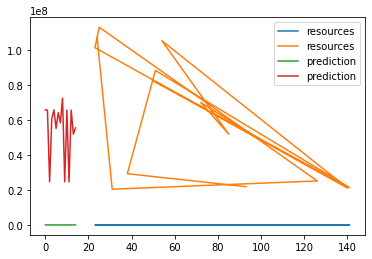

In [ ]:
plt.figure(1)
plt.plot(y_test, label='resources')
plt.plot(prediction, label='prediction')
plt.legend()